In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install pytorch-ignite

     |████████████████████████████████| 112kB 3.5MB/s 


In [3]:
%cd "/content/drive/My Drive/unet/unet-EdmCrack600-512_1/"

/content/drive/My Drive/unet/unet-EdmCrack600-512_1


In [0]:
import sys
sys.path.append('/content/drive/My Drive/unet/unet-EdmCrack600-512_1')

In [5]:
# Necessary to run DeepLabv3. Not necessary to Unet
!pip install albumentations==0.4.3
!pip install segmentation-models-pytorch==0.1.0
!pip install ttach==0.0.2
!pip install -U catalyst
!pip install tensorflow

     |████████████████████████████████| 3.2MB 99kB/s 
     |████████████████████████████████| 634kB 22.6MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.3-cp36-none-any.whl size=60764 sha256=e8f8f07eb88b8f75f8e33919bcc4e90793aaffc6a5ac71a891fa69fdfdb847b5
  Stored in directory: /root/.cache/pip/wheels/20/16/8e/d3bec34bf30adff30929226f0b83cc8c005b5af131f51db9d0
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=7d147f1ed04ca13b560f4f4299d398ef2d391453d5fdc060a0415618f9b7f030
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12
     |████████████████████████████████| 51kB 1.9MB/

In [0]:
import train
import trained_models
#import test_results
#import predict
import myutils
import model
import lovasz_losses
import focalloss
import Dice_coeff_loss
import dataset
import comparison
import combine_results
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.nn as nn
import torch.nn.functional as F
import time
import copy
import metrics
import visualize
import get_loss

In [9]:
#NOTE: to run train.unet_train() on colab it is necessary to run the cell ~5 times (ignore
# the errors happening before that, just re-run the cell until it works. It may take a few minutes). 
# This is necessary to cache all the real crack images.
# if the real crack images were separated in many files containing ~100 images each, maybe it would be faster. 
train.unet_train()

# Uncomment line below to make predictions
#import predict


#get_loss.get_loss_models()

228 64 32
len masks:  11760
len images:  11776
len masks:  11760
len images:  11760
len masks:  1680
len images:  1680
len masks:  1680
len images:  1680
dice adam
0 0
total loss:  tensor(1.0565, device='cuda:0', grad_fn=<AddBackward0>)
Epoch:0;     Iteration:0;      Loss:0.528242
0 10
total loss:  tensor(11.1795, device='cuda:0', grad_fn=<AddBackward0>)
0 20
total loss:  tensor(20.4569, device='cuda:0', grad_fn=<AddBackward0>)
0 30
total loss:  tensor(28.9261, device='cuda:0', grad_fn=<AddBackward0>)
0 40
total loss:  tensor(36.7024, device='cuda:0', grad_fn=<AddBackward0>)


KeyboardInterrupt: ignored

In [0]:
combine_results.combine('./test_results', './combined/raw_prediction', '')
combine_results.combine('../dataset-EdmCrack600-512/B/val', './combined/ground truth', '')
comparison.comparison('./combined/ground truth', './combined/raw_prediction')

test02417--0--0.png
test02417--0--256.png
test02417--0--512.png
test02417--0--568.png
test02417--1024--0.png
test02417--1024--256.png
test02417--1024--512.png
test02417--1024--568.png
test02417--1280--0.png
test02417--1280--256.png
test02417--1280--512.png
test02417--1280--568.png
test02417--1408--0.png
test02417--1408--256.png
test02417--1408--512.png
test02417--1408--568.png
test02417--256--0.png
test02417--256--256.png
test02417--256--512.png
test02417--256--568.png
test02417--512--0.png
test02417--512--256.png
test02417--512--512.png
test02417--512--568.png
test02417--768--0.png
test02417--768--256.png
test02417--768--512.png
test02417--768--568.png
test03140--0--0.png
test03140--0--256.png
test03140--0--512.png
test03140--0--568.png
test03140--1024--0.png
test03140--1024--256.png
test03140--1024--512.png
test03140--1024--568.png
test03140--1280--0.png
test03140--1280--256.png
test03140--1280--512.png
test03140--1280--568.png
test03140--1408--0.png
test03140--1408--256.png
test0314

(0.833175938356734, 0.7265625321273189, 0.7615023151776857)

In [0]:
# All the code below is related to visualizations/evaluating the model

In [10]:
from myutils import transform
from focalloss import FocalLoss
from dataset import DatasetRealCrack
from dataset import DatasetSealedCrack, DatasetRealCrack
import torch
from myutils import transform, cal_iou, onehot, data_Train_transforms, data_Test_transforms
SC_root_dir = '../dataset-EdmSealedCrack-512'
train_files, val_files, test_files =  myutils.organize_SC_files(SC_root_dir)

num_workers = 2
train_RC_dataset = DatasetRealCrack('../dataset-EdmCrack600-512/A/train', transform=transform)
train_SC_dataset = DatasetSealedCrack(files=train_files, root_dir= SC_root_dir, transform=data_Test_transforms)
val_RC_dataset = DatasetRealCrack('../dataset-EdmCrack600-512/A/val', transform=transform)
val_SC_dataset = DatasetSealedCrack(files=val_files, root_dir= SC_root_dir, transform=data_Test_transforms)
test_SC_dataset = DatasetSealedCrack(files=test_files, root_dir= SC_root_dir, transform=data_Test_transforms)

train_RC_loader = DataLoader(dataset=train_RC_dataset,
                            batch_size=1,
                            shuffle=True,
                            num_workers=num_workers)
val_RC_loader = DataLoader(dataset=val_RC_dataset,
                            batch_size=1,
                            shuffle=True)
                            
train_SC_loader = DataLoader(dataset=train_SC_dataset,
                            batch_size=1,
                            shuffle= True,
                            num_workers=num_workers)
val_SC_loader = DataLoader(dataset=val_SC_dataset,
                            batch_size=1,
                            shuffle=True
                            )
test_SC_loader = DataLoader(dataset=test_SC_dataset,
                            batch_size=1,
                            shuffle=True
                            )
    
criterion = nn.BCELoss()
focallos = FocalLoss(gamma=2)

228 64 32
len masks:  11760
len images:  11776
len masks:  11760
len images:  11760
len masks:  1680
len images:  1680
len masks:  1680
len images:  1680


In [11]:
from myutils import transform, cal_iou, onehot
from model import Unet, classifier, Unet_SpatialPyramidPooling
import torch 
from torchvision import models
from torchvision.models.segmentation.deeplabv3 import DeepLabHead

#even though we are evaluating the model, 
# we do not set model.eval becouse of the conditions the model was trained: small batch size (of 1 or 2 images/batch)
    
unet = Unet(3).cuda()
SC_classifier = classifier(64, 2).cuda()
RC_classifier = classifier(64, 2).cuda()
unet.load_state_dict(torch.load('trained_models/unet_adam_dice_58.pkl'))
SC_classifier.load_state_dict(torch.load('trained_models/SC_classifier_adam_dice_58.pkl'))
RC_classifier.load_state_dict(torch.load('trained_models/RC_classifier_adam_dice_58.pkl'))

<All keys matched successfully>

In [0]:
# to choose the dataset: train_SC_loader, val_SC_loader, train_RC_loader, ...
# visualize_real_and_sealed_cracks_superposition saves 20 images on the folder "suporpostions"
visualize.visualize_real_and_sealed_cracks_superposition(train_RC_loader, unet, RC_classifier, SC_classifier)
#metrics.pixel_accuracy(data_loader = val_RC_loader, model = unet, classifier = RC_classifier)

/content/drive/My Drive/unet/unet-EdmCrack600-512_1/focalloss.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  logpt = F.log_softmax(input)


tensor(14089, device='cuda:0') tensor(1126, device='cuda:0') tensor(9103, device='cuda:0')
precision:  tensor(0.9260, device='cuda:0')
recall:  tensor(0.6075, device='cuda:0')
F1 score:  tensor(0.7337, device='cuda:0')


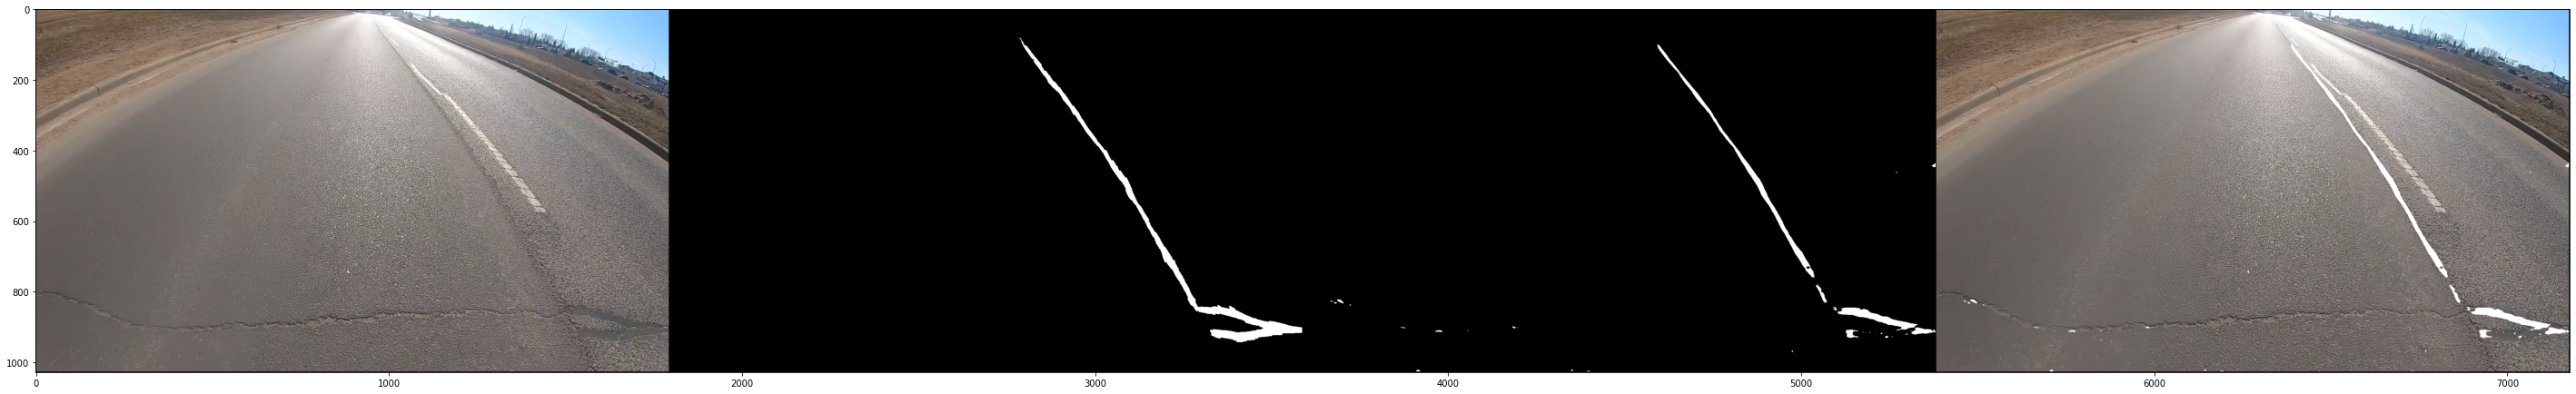

In [15]:
# visualizing a specific image
from myutils import transform, cal_iou, onehot, data_Train_transforms, data_Test_transforms
from PIL import Image
from dataset import tif2binary
SC_root_dir = '../dataset-EdmSealedCrack-512'
img = Image.open(SC_root_dir + '/A/' + 'test16-1183' + '.png').convert('RGB')
anotation = tif2binary(SC_root_dir, 'test16-1183')
sample = {'image': img, 'anotation': anotation}  # add ids of the images
sample = data_Test_transforms(sample)
sample = {'image': sample['image'].unsqueeze(0), 'anotation': sample['anotation'].unsqueeze(0)} 
visualize.visualize_example(sample = sample, model = unet, classifier = SC_classifier)

/content/drive/My Drive/unet/unet-EdmCrack600-512_1/focalloss.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  logpt = F.log_softmax(input)


tensor(15320, device='cuda:0') tensor(4139, device='cuda:0') tensor(3034, device='cuda:0')
precision:  tensor(0.7873, device='cuda:0')
recall:  tensor(0.8347, device='cuda:0')
F1 score:  tensor(0.8103, device='cuda:0')


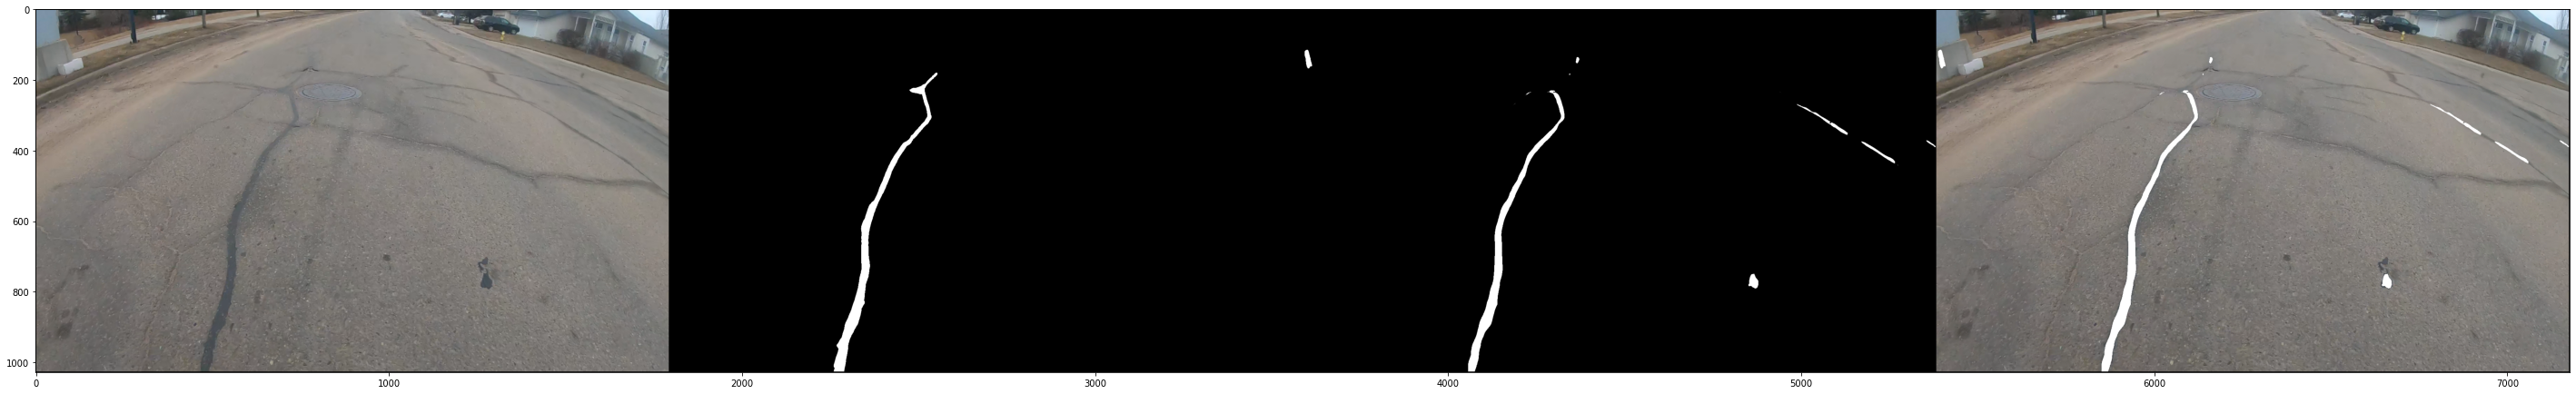

In [18]:
# visualizing a random image image
visualize.visualize_example(data_loader = val_SC_loader, model = unet, classifier = SC_classifier)

/content/drive/My Drive/unet/unet-EdmCrack600-512_1/focalloss.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  logpt = F.log_softmax(input)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(1208, device='cuda:0') tensor(1033, device='cuda:0') tensor(1247, device='cuda:0')
precision:  tensor(0.5390, device='cuda:0')
recall:  tensor(0.4921, device='cuda:0')
F1 score:  tensor(0.5145, device='cuda:0')


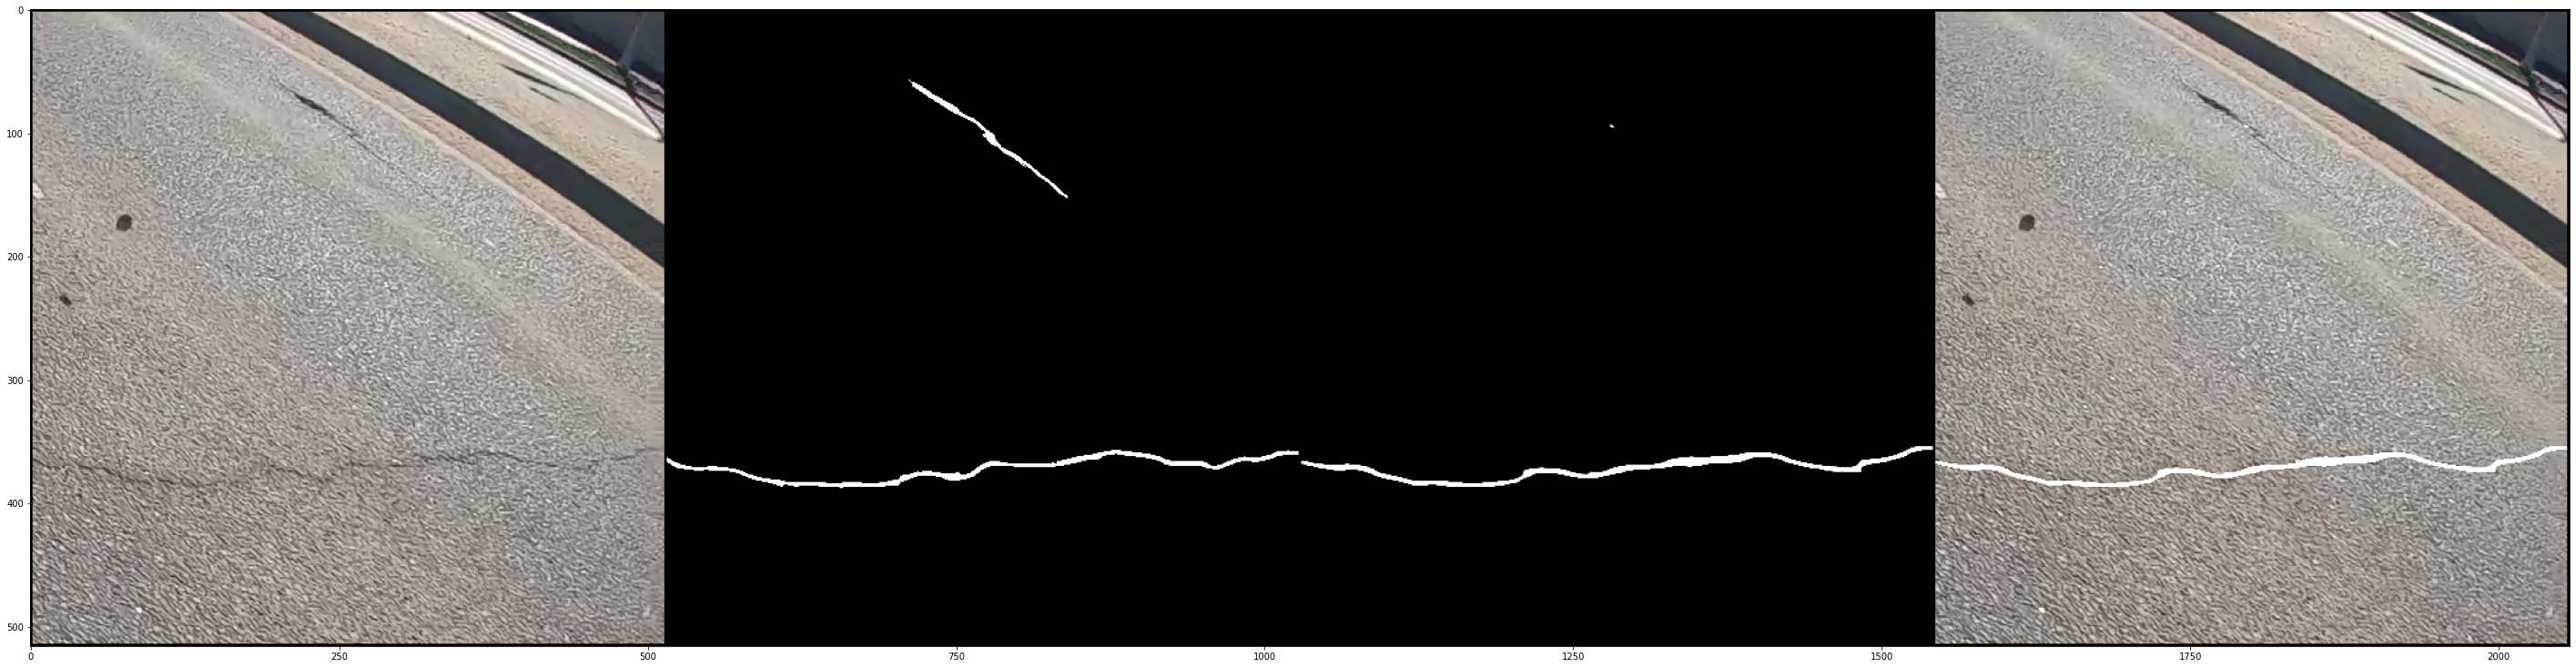

In [15]:
visualize.visualize_example(data_loader = val_RC_loader, model = unet, classifier = RC_classifier)

In [0]:
metrics.F1_score_across_dataloader(test_SC_loader, unet, SC_classifier)